<a href="https://colab.research.google.com/github/dharaneyogees/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

**LOADING** **DATA**

In [ ]:
# working with older data files or datasets from sources that use latin1 encoding.
df=pd.read_csv('/content/IMDb Movies India.csv',encoding="latin1")

In [ ]:
df.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [ ]:
df.tail()

Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action     4.6    11   
15505                Zulmi  (1999)  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj  (2005)      NaN         Action     NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja

**EXPLORATORY** **DATA** **ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

**DATA** **PREPROCESSING**

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dropna(subset=["Rating"],inplace=True)

In [ ]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [ ]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [ ]:
df['Votes']=df['Votes'].str.replace(',', '').astype(int)

In [ ]:
#df['Year']=df['Year'].str.strip('()').astype(int)

In [ ]:
df['Duration']=df['Duration'].str.strip('min')

In [ ]:
df['Duration'].fillna(df['Duration'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

**EDA**

In [ ]:
genre_counts=df['Genre'].value_counts().reset_index()
genre_counts.columns=['Genre','Count']

top_genres=genre_counts.head(10)
top_genres

Genre  Count
0                   Drama   1137
1          Drama, Romance    443
2    Action, Crime, Drama    417
3                  Action    391
4           Drama, Family    291
5           Action, Drama    270
6                  Comedy    251
7           Comedy, Drama    237
8                 Romance    226
9  Comedy, Drama, Romance    213

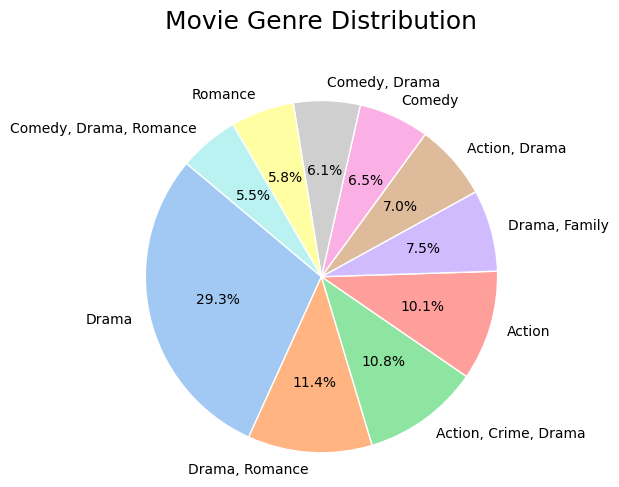

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(
    top_genres['Count'],
    labels=top_genres['Genre'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'w', 'linewidth': 1}
)
plt.title('Movie Genre Distribution', fontsize=18, pad=40)
plt.axis('equal')
plt.show()

In [ ]:
director_avg_rating=df.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating=director_avg_rating.sort_values(by='Rating',ascending=False)
director_avg_rating.columns=['Director','Rating']

top_directors=director_avg_rating.head(10)
top_directors

Director  Rating
2243  Saif Ali Sayeed    10.0
2560      Sriram Raja     9.7
504       Bobby Kumar     9.6
322     Arvind Pratap     9.4
1513     Munni Pankaj     9.4
2598   Suhrud Godbole     9.4
1601     Nikhil Mahar     9.3
2809     Venkatesh Bk     9.3
1879    Rahul Mallick     9.3
1864   Raghav Jairath     9.3

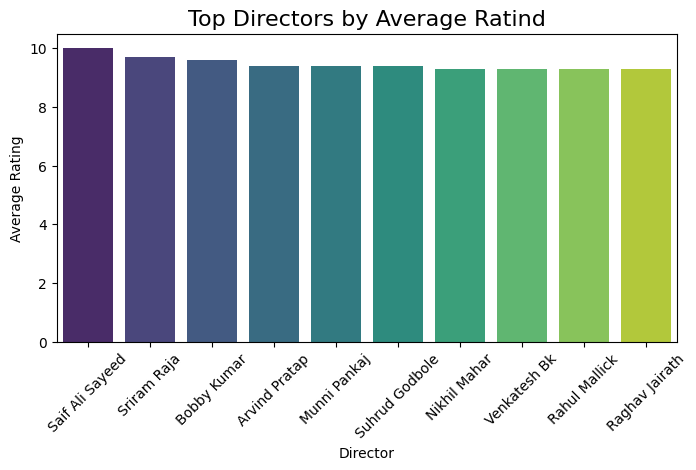

In [ ]:
# top directors by average rating
plt.figure(figsize= (8,4))
sns.barplot(x='Director',y='Rating',data=top_directors, palette='viridis')
plt.title('Top Directors by Average Ratind', fontsize=16)
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

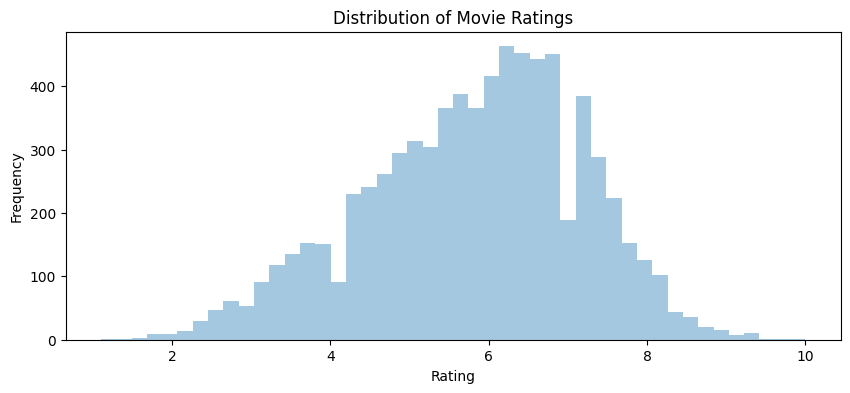

In [ ]:
# distribution of movie rating
plt.figure(figsize= (10,4))
dist=sns.distplot(df['Rating'],kde=False)
dist.set_title('Distribution of Movie Ratings')
dist.set_xlabel('Rating')
dist.set_ylabel('Frequency')
plt.show()

In [ ]:
df=pd.DataFrame(df)

In [ ]:
rating_votes=df.groupby('Rating')['Votes'].sum().reset_index()
#ratins_votes.columns=['Rating','Votes']
#ratins_votes

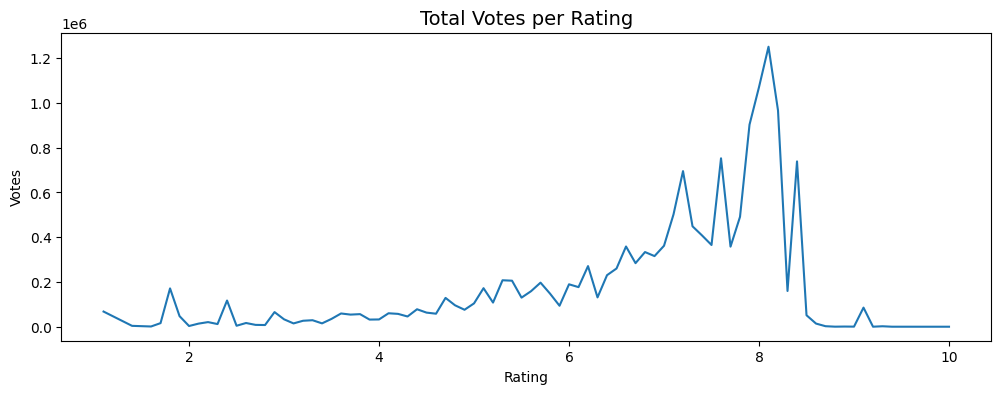

In [ ]:
# total votes per rating
plt.figure(figsize=(12,4))
sns.lineplot(x='Rating',y='Votes',data=rating_votes)
plt.title('Total Votes per Rating',fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Votes')
#plt.axis('equal')
plt.show()

In [ ]:
yearly_movie_counts=df['Year'].value_counts().reset_index()
yearly_movie_counts.columns=['Year','MovieCount']
yearly_movie_counts=yearly_movie_counts.sort_values(by='Year')

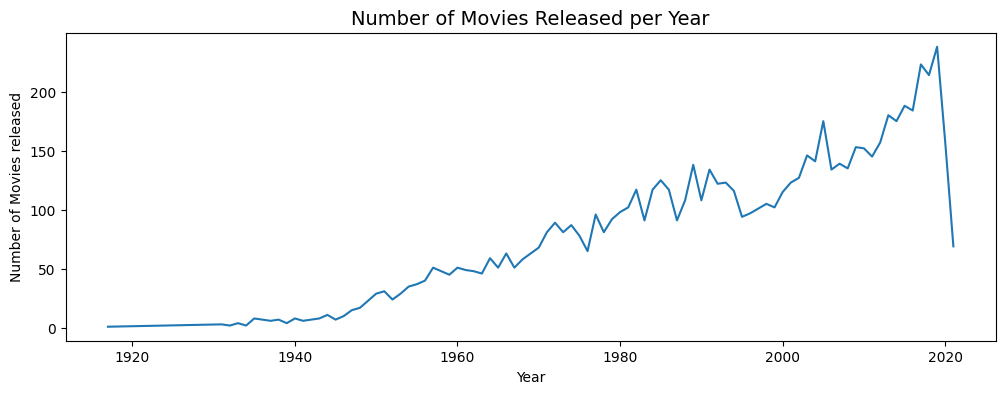

In [ ]:
# number of Movies  released every Year
plt.figure(figsize=(12,4))
sns.lineplot(x='Year',y='MovieCount',data=yearly_movie_counts)
plt.title('Number of Movies Released per Year',fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Movies released')
plt.show()

In [ ]:
# duration of movies per year
df['Year']=df['Year'].astype(int)
df['Duration']=df['Duration'].astype(int)

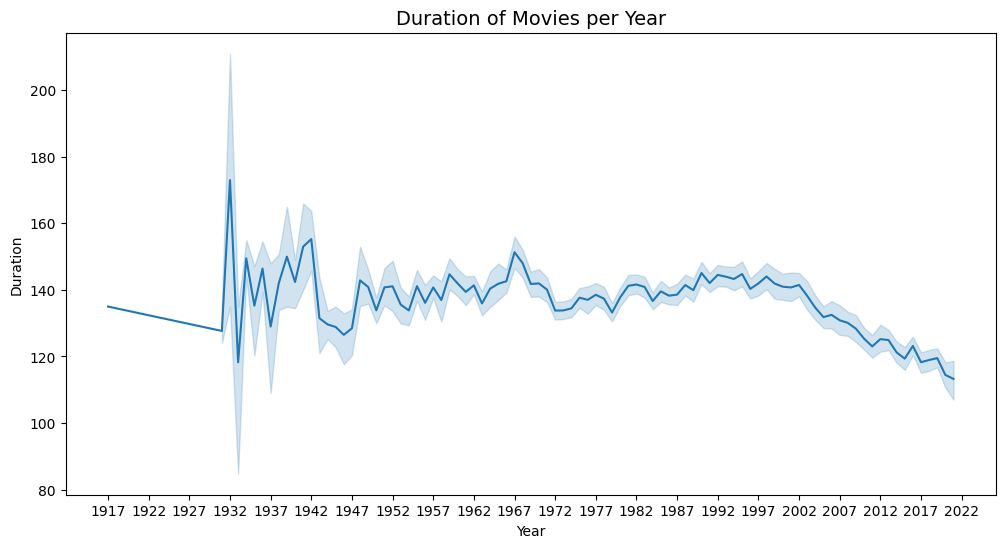

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Duration',data=df)
plt.title('Duration of Movies per Year',fontsize=14)
plt.xlabel('Year')
plt.ylabel('Duration')
plt.xticks(np.arange(1917,2023,5))
plt.show()

In [ ]:
df['Genre']=df['Genre'].str.split(', ')

#creating new df with one row for each genre
genre_df=df.explode('Genre')

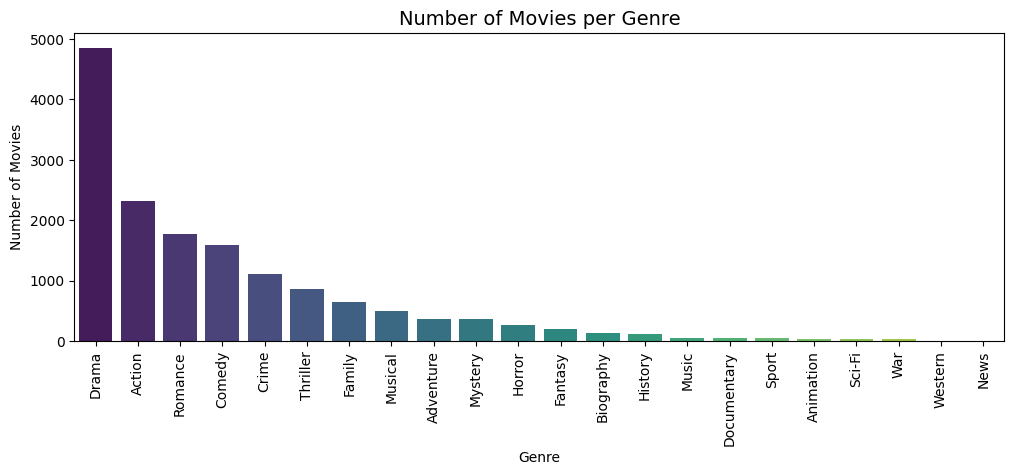

In [ ]:
# number of movies for each genre
plt.figure(figsize=(12,4))
sns.countplot(data=genre_df,x='Genre',order=genre_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies per Genre',fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
average_rating_by_genre=genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre=average_rating_by_genre.sort_values(by='Rating',ascending=False)

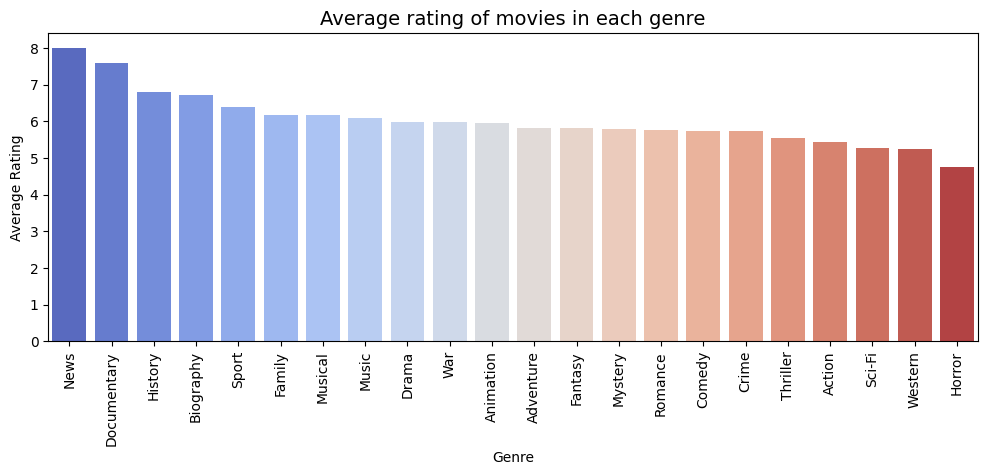

In [ ]:
# average rating of movies in each genre

plt.figure(figsize=(12,4))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.title('Average rating of movies in each genre',fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**Feature** **Engineering**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
trans_data=df.drop(['Name'],axis=1)

#transform director columns
trans_data['Director']=labelencoder.fit_transform(df['Director'])

trans_data['Actor 1']=labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2']=labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3']=labelencoder.fit_transform(df['Actor 3'])

trans_data['Genre']=labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x)))
trans_data.head()

Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  Actor 3
1  2019       109    252     7.0      8       755     1686     2725      373
3  2019       110    205     4.4     35      1637     1500      865     2543
5  1997       147    175     4.7    827      1881      481       84     2422
6  2005       142    315     7.4   1086      2486      878     1346     2996
8  2012        82    351     5.6    326       161     2385     1416     1189

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
sc_data=scaler.fit_transform(trans_data)
sc_data=pd.DataFrame(sc_data,columns=trans_data.columns)
sc_data.head()

Year  Duration     Genre    Rating     Votes  Director   Actor 1  \
0  0.980769  0.293333  0.607229  0.662921  0.000005  0.255499  0.698426   
1  0.980769  0.296667  0.493976  0.370787  0.000051  0.553976  0.621375   
2  0.769231  0.420000  0.421687  0.404494  0.001390  0.636548  0.199254   
3  0.846154  0.403333  0.759036  0.707865  0.001828  0.841286  0.363712   
4  0.913462  0.203333  0.845783  0.505618  0.000543  0.054484  0.987987   

    Actor 2   Actor 3  
0  0.979511  0.123102  
1  0.310927  0.839274  
2  0.030194  0.799340  
3  0.483825  0.988779  
4  0.508986  0.392409

In [ ]:
#correlation
corr_df=trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

**Model Selection and Training**

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
x=trans_data.drop(['Rating'],axis=1)
y=trans_data['Rating']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse',metrics=['mse','mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
152/152 [==============================] - 2s 6ms/step - loss: 2844.5005 - mse: 2844.5005 - mae: 18.5926 - val_loss: 911.7917 - val_mse: 911.7917 - val_mae: 28.5824
Epoch 2/10
152/152 [==============================] - 1s 4ms/step - loss: 780.5350 - mse: 780.5350 - mae: 9.1240 - val_loss: 179.2433 - val_mse: 179.2433 - val_mae: 10.5223
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: 41.5114 - mse: 41.5114 - mae: 3.5710 - val_loss: 12.2398 - val_mse: 12.2398 - val_mae: 2.2596
Epoch 4/10
152/152 [==============================] - 0s 3ms/step - loss: 14.3947 - mse: 14.3947 - mae: 2.0935 - val_loss: 33.8839 - val_mse: 33.8839 - val_mae: 2.4929
Epoch 5/10
152/152 [==============================] - 0s 3ms/step - loss: 35.0597 - mse: 35.0597 - mae: 2.4187 - val_loss: 7.8467 - val_mse: 7.8467 - val_mae: 1.7535
Epoch 6/10
152/152 [==============================] - 0s 3ms/step - loss: 12.7429 - mse: 12.7429 - mae: 1.8553 - val_loss: 19.1883 - val_mse: 19.1883